In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
""" Extracting Training data """
Train_set = []
with open ('DS2_train.csv','r') as file:
    lines = file.readlines()
    for l in lines:
        lread = l.split(',') 
        fl_lread = list(map(lambda x: float(x), lread))
        Train_set.append(fl_lread)
Train_set = np.array(Train_set)

In [18]:
""" Extracting Test data """
Test_set = []
with open ('DS2_test.csv','r') as file:
    lines = file.readlines()
    for l in lines:
        lread = l.split(',') 
        fl_lread = list(map(lambda x: float(x), lread))
        Test_set.append(fl_lread)
Test_set = np.array(Test_set)

In [19]:
def DistanceCalc(Test_set, Train_set):
   
    for i in range(len(Test_set)):
        for j in range(len(Train_set)):
            distance[i, j] = np.sqrt(np.sum(np.power(Test_set[i,1:] - Train_set[j,1:], 2)))
    
    """ Sorting the Calculated Distance by Row in Ascending Order"""
    sorted_distance = np.argsort(distance)
    return(sorted_distance)

In [20]:
def KNearestNeighbor(Train_set, Test_set, k , sorted_distance):

    """ Extracting the Train Labels Corresponding to the K Lowest Distance"""
    Train_label = np.zeros([1200 , k])
    for i in range(len(sorted_distance)):
        for j in range(k):
            Train_label[i,j] = Train_set[int(sorted_distance[i,j]), 0]

    """ Predicting the Label """
    label_sum = []
    label_div = []
    label_predict = []

    for i in range(len(Train_label)):
        label_sum.append(np.sum(Train_label[i]))
        label_div.append(np.divide(np.array(label_sum[i]),k))
    label_predict = np.array(label_div)


    for i in range(len(label_predict)):
        if label_predict[i] > 0.5:
            label_predict[i] = 1
        else:
            label_predict[i] = 0

    return(label_predict)

In [21]:
def EvaluationMetrics(label_predict):
    
    """ Calculating Accuracy """
    temp = 0
    for i in range(len(label_predict)):
        if Test_set[i,0] == label_predict[i]:
            temp = temp +1
    accuracy = (temp/1200.)


    """ Calculating Precision """
    temp_tp = 0
    temp_fp = 0
    for i in range(len(label_predict)):
        if Test_set[i,0] == 1 and label_predict[i] == 1:
            temp_tp = temp_tp +1
        if Test_set[i,0] == 0 and label_predict[i] == 1:
            temp_fp = temp_fp +1

    precision = (temp_tp/(temp_tp + temp_fp))


    """ Calculating Recall """
    temp_fn = 0
    for i in range(len(label_predict)):
        if Test_set[i,0] == 1 and label_predict[i] == 0:
            temp_fn = temp_fn +1

    recall = (temp_tp/(temp_tp + temp_fn))


    """ Calculating F-Measure"""

    f_measure = 2*((precision * recall)/ (precision + recall))
    
    return(accuracy, precision, recall, f_measure)

In [28]:
distance = np.zeros([1200, 2800])
d = DistanceCalc(Test_set, Train_set)
neighbor = []
accuracy = []
for k in range(1,200):
    if(k%2!=0):
        l = KNearestNeighbor(Train_set, Test_set, k, d)
        a,p,r,f = EvaluationMetrics(l)
        neighbor.append(k)
        accuracy.append(a)
        print("k:", k, "Accuracy:", a*100, "Precision:", p*100, "Recall:", r*100, "F-Measure:", f*100 )
        print("\n")


k: 1 Accuracy: 50.916666666666664 Precision: 50.924369747899156 Recall: 50.5 F-Measure: 50.711297071129714


k: 3 Accuracy: 51.83333333333333 Precision: 51.79153094462541 Recall: 53.0 F-Measure: 52.38879736408567


k: 5 Accuracy: 53.5 Precision: 53.47682119205298 Recall: 53.833333333333336 F-Measure: 53.65448504983388


k: 7 Accuracy: 54.58333333333333 Precision: 54.60636515912898 Recall: 54.333333333333336 F-Measure: 54.46950710108606


k: 9 Accuracy: 53.75 Precision: 53.756260434056756 Recall: 53.666666666666664 F-Measure: 53.71142618849041


k: 11 Accuracy: 53.166666666666664 Precision: 53.14569536423841 Recall: 53.5 F-Measure: 53.322259136212615


k: 13 Accuracy: 53.41666666666667 Precision: 53.42237061769616 Recall: 53.333333333333336 F-Measure: 53.377814845704755


k: 15 Accuracy: 54.666666666666664 Precision: 54.60526315789473 Recall: 55.333333333333336 F-Measure: 54.966887417218544


k: 17 Accuracy: 53.75 Precision: 53.65853658536586 Recall: 55.00000000000001 F-Measure: 54.3209

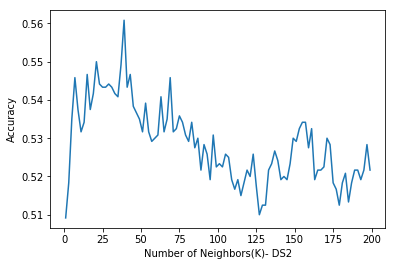

In [30]:
plt.plot(neighbor, accuracy)
plt.xlabel('Number of Neighbors(K)- DS2')
plt.ylabel('Accuracy')
plt.show()